In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
minmax = MinMaxScaler()

In [3]:
data = pd.read_csv('final_dataset.csv',index_col=0)
data2 = pd.read_csv('final_dataset2.csv',index_col=0)
data['count'] = data2['count']
# data['class'] = data['class'].replace([0],1)
# df1= data.groupby('class')['class'].count()
# print(df1)
data.head()

,class,scale,Pos,Neg,binary,QuestionMarkCount,QuotationMarkCount,ExclamationMarkCount,AllCapitalised,bitch,...,#sex,#xxx,blow,mother,drug,rap,sexi,lip,thick,count
0,2,-1,1,-2,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,-2,1,-3,-1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,-2,2,-4,-1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
3,1,1,2,-1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,2,-2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [4]:

X = data.iloc[:,1:]  #independent columns
X = minmax.fit_transform(X)
y = data.iloc[:,0]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
print(y.head())

0    2
1    1
2    1
3    1
4    1
Name: class, dtype: int64


[1.83260496e-02 1.47926809e-02 3.02119750e-02 1.32783950e-02
 1.48704589e-02 2.96240903e-02 1.54075163e-02 2.76126757e-02
 1.66316833e-01 2.18924075e-02 1.76592674e-02 1.49788578e-02
 1.60594101e-02 1.43157862e-02 9.98240460e-03 4.25261150e-02
 1.32221512e-02 1.19708835e-01 2.88944321e-03 9.39678584e-03
 1.52577185e-02 6.43889669e-02 3.81498632e-03 3.29525732e-03
 2.67196972e-03 4.19200540e-03 2.08078937e-03 3.07093385e-03
 5.57931026e-03 3.29445697e-03 2.75093937e-03 1.89998878e-03
 7.89153086e-03 4.06895757e-03 2.92295402e-03 3.76432877e-03
 7.50482013e-03 2.04858512e-03 2.08926641e-03 1.45879801e-02
 1.36244436e-03 9.90599348e-03 2.95852992e-03 2.40302075e-03
 1.92282605e-03 2.53196818e-03 6.25973786e-03 2.74013278e-03
 1.77152047e-03 2.12339507e-03 1.80389161e-03 1.88614665e-03
 1.42949996e-03 4.27584288e-03 2.49658198e-03 1.28494503e-03
 1.39995008e-03 2.80418947e-03 1.54060711e-03 1.77352037e-03
 1.78436451e-03 1.55545040e-03 6.90363176e-04 1.06250123e-03
 9.73036007e-04 1.355719

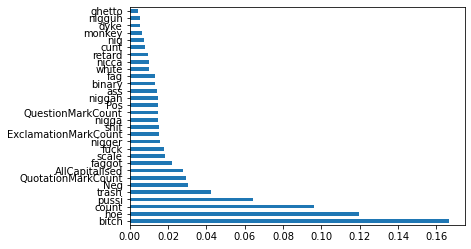

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns[1:])
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [6]:
print(feat_importances.nlargest(10).index)
columns = list(feat_importances.nlargest(150).index)
print(columns)

Index(['bitch', 'hoe', 'count', 'pussi', 'trash', 'Neg', 'QuotationMarkCount',
       'AllCapitalised', 'faggot', 'scale'],
      dtype='object')
['bitch', 'hoe', 'count', 'pussi', 'trash', 'Neg', 'QuotationMarkCount', 'AllCapitalised', 'faggot', 'scale', 'fuck', 'nigger', 'ExclamationMarkCount', 'shit', 'nigga', 'QuestionMarkCount', 'Pos', 'niggah', 'ass', 'binary', 'fag', 'white', 'nicca', 'retard', 'cunt', 'nig', 'monkey', 'dyke', 'nigguh', 'ghetto', 'queer', 'fuckin', 'call', 'cracker', 'black', 'coon', 'twat', 'negro', 'gay', 'dick', 'red', 'tri', 'hate', 'teabagg', 'racist', 'redneck', 'kill', 'mean', 'bad', 'work', 'die', 'spic', 'stupid', 'smh', 'beaner', 'ugli', 'whitey', 'jew', 'wetback', 'race', 'suck', 'tranni', 'hit', 'hell', 'beat', 'head', 'dumb', 'babi', 'fat', 'mad', 'pick', 'money', 'stfu', 'chick', 'leav', 'gook', 'mom', 'parti', 'sinc', 'throw', 'shoot', 'high', 'sex', 'bruh', 'cri', 'sorri', 'fight', 'hood', 'bag', '_jason', 'pig', 'asshol', 'muzzi', 'whore', 'cut'

In [96]:
# columns = ['bitch','hoe','pussi','trash','QuotationMarkCount','AllCapitalised','faggot','fuck','scale','nigger','niggah','shit','nigga','ass',
#            'ExclamationMarkCount','QuestionMarkCount','nicca','Neg','Pos','retard','binary','fag','white','cunt','nig','dyke','monkey','queer','fuckin','nigguh']

In [7]:
new = data[columns]
new.head()

,bitch,hoe,count,pussi,trash,Neg,QuotationMarkCount,AllCapitalised,faggot,scale,...,lip,israel,skinni,kno,#xxx,#sex,thick,slap,xxx,ðŸ‘Š
0,0,0,1,0,1,-2,1,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,0,0,-3,0,0,0,-2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,4,0,0,-4,0,0,0,-2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,0,-2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = new[columns].to_numpy()
X = minmax.fit_transform(X)
y = data['class'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=data['class'])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing

In [12]:
def checkAccuracy(X_train,y_train,X_test,y_test):
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print('Logistic Accuracy: ', accuracy_score(y_test, y_pred) * 100)
#     return accuracy_score(y_test, y_pred) * 100
    
    
    clf = RandomForestClassifier(max_depth=35,random_state=0, min_samples_leaf=1, bootstrap=True)
    clf.fit(X_train, y_train)
    Score = clf.score(X_test,y_test)
#     return Score*100
    print('Random Forest: ',Score*100)
    
    classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=0.025, probability=True),
#     NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        print("Log Loss: {}".format(ll))

        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)

    print("="*30)
    
    





In [13]:
checkAccuracy(X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[  56  198   32]
 [  35 3630  173]
 [   1   39  793]]
Logistic Accuracy:  90.35707080895703
Random Forest:  89.02562033487996
DecisionTreeClassifier
****Results****
Accuracy: 86.8872%
Log Loss: 3.1601285292399286
RandomForestClassifier
****Results****
Accuracy: 89.2274%
Log Loss: 0.5479381526337334
AdaBoostClassifier
****Results****
Accuracy: 88.5616%
Log Loss: 1.0102678713204178
GradientBoostingClassifier
****Results****
Accuracy: 88.6423%
Log Loss: 0.2995398399001043
GaussianNB
****Results****
Accuracy: 26.1045%
Log Loss: 24.156403848934517
LinearDiscriminantAnalysis
****Results****
Accuracy: 87.8354%
Log Loss: 0.4556929757854189


/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 22.9574%
Log Loss: 26.567809072275686


In [14]:
corrmat = data.corr()
top_corr_features = corrmat.index

In [15]:
print(top_corr_features)

Index(['class', 'scale', 'Pos', 'Neg', 'binary', 'QuestionMarkCount',
       'QuotationMarkCount', 'ExclamationMarkCount', 'AllCapitalised', 'bitch',
       ...
       '#sex', '#xxx', 'blow', 'mother', 'drug', 'rap', 'sexi', 'lip', 'thick',
       'count'],
      dtype='object', length=147)


In [17]:
def train(count):
    X = data.iloc[:,1:]  #independent columns
    X = minmax.fit_transform(X)
    y = data.iloc[:,0]   
    acc= []
    columns = list(feat_importances.nlargest(count).index)
    new = data[columns]
    X = new[columns].values
    X = minmax.fit_transform(X)
    y = data['class'].values
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=data['class'])
    return checkAccuracy(X_train,y_train,X_test,y_test)

In [18]:
acc= []
for i in range(1,150):
    acc.append(train(i))
    

[[   0  286    0]
 [   0 3838    0]
 [   0  833    0]]
Logistic Accuracy:  77.42586241678434
Random Forest:  77.42586241678434
DecisionTreeClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.5388800563042393
RandomForestClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.538838150375121
AdaBoostClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 1.0610522741598403
GradientBoostingClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.5388343733221627
GaussianNB
****Results****
Accuracy: 59.7135%
Log Loss: 0.9383191326700593
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.4259%
Log Loss: 0.5495073330058986
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 59.7135%
Log Loss: 0.9382777943463022
[[   0  286    0]
 [   0 3838    0]
 [   0  833    0]]
Logistic Accuracy:  77.42586241678434
Random Forest:  77.42586241678434
DecisionTreeClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.47317418782293014
RandomForestClassifier
****Results****
Accuracy: 77

AdaBoostClassifier
****Results****
Accuracy: 86.3224%
Log Loss: 1.0457718323420413
GradientBoostingClassifier
****Results****
Accuracy: 86.9881%
Log Loss: 0.3379387069390966
GaussianNB
****Results****
Accuracy: 81.8237%
Log Loss: 1.7260723744930024
LinearDiscriminantAnalysis
****Results****
Accuracy: 84.1638%
Log Loss: 0.42053300884219275
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 81.5816%
Log Loss: 1.8023837292509424
[[  23  204   59]
 [  21 3572  245]
 [   1  163  669]]
Logistic Accuracy:  86.01977002219084
Random Forest:  86.24167843453702
DecisionTreeClassifier
****Results****
Accuracy: 85.6163%
Log Loss: 1.6641519387005037
RandomForestClassifier
****Results****
Accuracy: 86.3425%
Log Loss: 0.6782090413537547
AdaBoostClassifier
****Results****
Accuracy: 86.9679%
Log Loss: 1.0423165522141995
GradientBoostingClassifier
****Results****
Accuracy: 87.1293%
Log Loss: 0.3282704630456469
GaussianNB
****Results****
Accuracy: 81.8035%
Log Loss: 2.6217115644863185
LinearDiscrimin

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(acc.index(max(acc)))
print(max(acc))

In [ ]:
acc= []
for i in range(1,150):
    acc.append(train(i))
    

[[   0  286    0]
 [   0 3838    0]
 [   0  833    0]]
Logistic Accuracy:  77.42586241678434
Random Forest:  77.42586241678434
DecisionTreeClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.5378544507266689
RandomForestClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.5378541231177097
AdaBoostClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 1.0627890621428326
GradientBoostingClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.5378796824302208
GaussianNB
****Results****
Accuracy: 59.2294%
Log Loss: 0.8481865014542246
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.4259%
Log Loss: 0.5506673583153882
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 59.2294%
Log Loss: 0.8481462072676329
[[   0  286    0]
 [   0 3838    0]
 [   0  833    0]]
Logistic Accuracy:  77.42586241678434
Random Forest:  77.42586241678434
DecisionTreeClassifier
****Results****
Accuracy: 77.4259%
Log Loss: 0.47499033169728944
RandomForestClassifier
****Results****
Accuracy: 7

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[  22  193   71]
 [  27 3556  255]
 [   1  159  673]]
Logistic Accuracy:  85.75751462578172
Random Forest:  85.91890256203348
DecisionTreeClassifier
****Results****
Accuracy: 85.2532%
Log Loss: 1.3122050180332276


In [ ]:
print(acc.index(max(acc)))
print(max(acc))

In [ ]:
print(acc[99])

In [ ]:
train(44)